## Import libraries

In [5]:
import glob
import pandas as pd
import numpy as np
import plotnine as p9
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import seaborn as sns

## Initialize contants

In [3]:
root_data_dir = '/projects/genomic-ml/da2343/ml_project_1/data'

## Transform OTU data

In [ ]:
# dataset_list = ['baxter_crc_data', 'crohns_data', 'glne007_data', 'global_patterns_data', 'esophagus_data', 'enterotype_data', 'hmp2prot_data', 'hmp216S_data', 'mixmpln_real_data', 'soilrep_data', 'ioral_data' ]
# dataset_list = ['amgut1_data', 'amgut2_data']
dataset_list = ['amgut2_data']


for dataset_name in dataset_list:
    dataset_df = pd.read_csv(f'{root_data_dir}/{dataset_name}_update.csv', header=0)
    # Add 1 to all the values
    # dataset_df = dataset_df + 1
    # dataset_df = pd.read_csv(f'./{dataset_name}_update.csv', header=0)
    # data_transformed = PowerTransformer().fit_transform(dataset_df)
    # Fit transformer to data
    # Transform data to normal distribution
    data_transformed = StandardScaler().fit_transform(dataset_df)
    dataset_df_scaled = pd.DataFrame(data_transformed, columns=dataset_df.columns) 
    # save the log transformed data
    dataset_df_scaled.to_csv(f'{root_data_dir}/{dataset_name}_standard_scaled.csv', index=False)


## Plot Data Transformation Graph

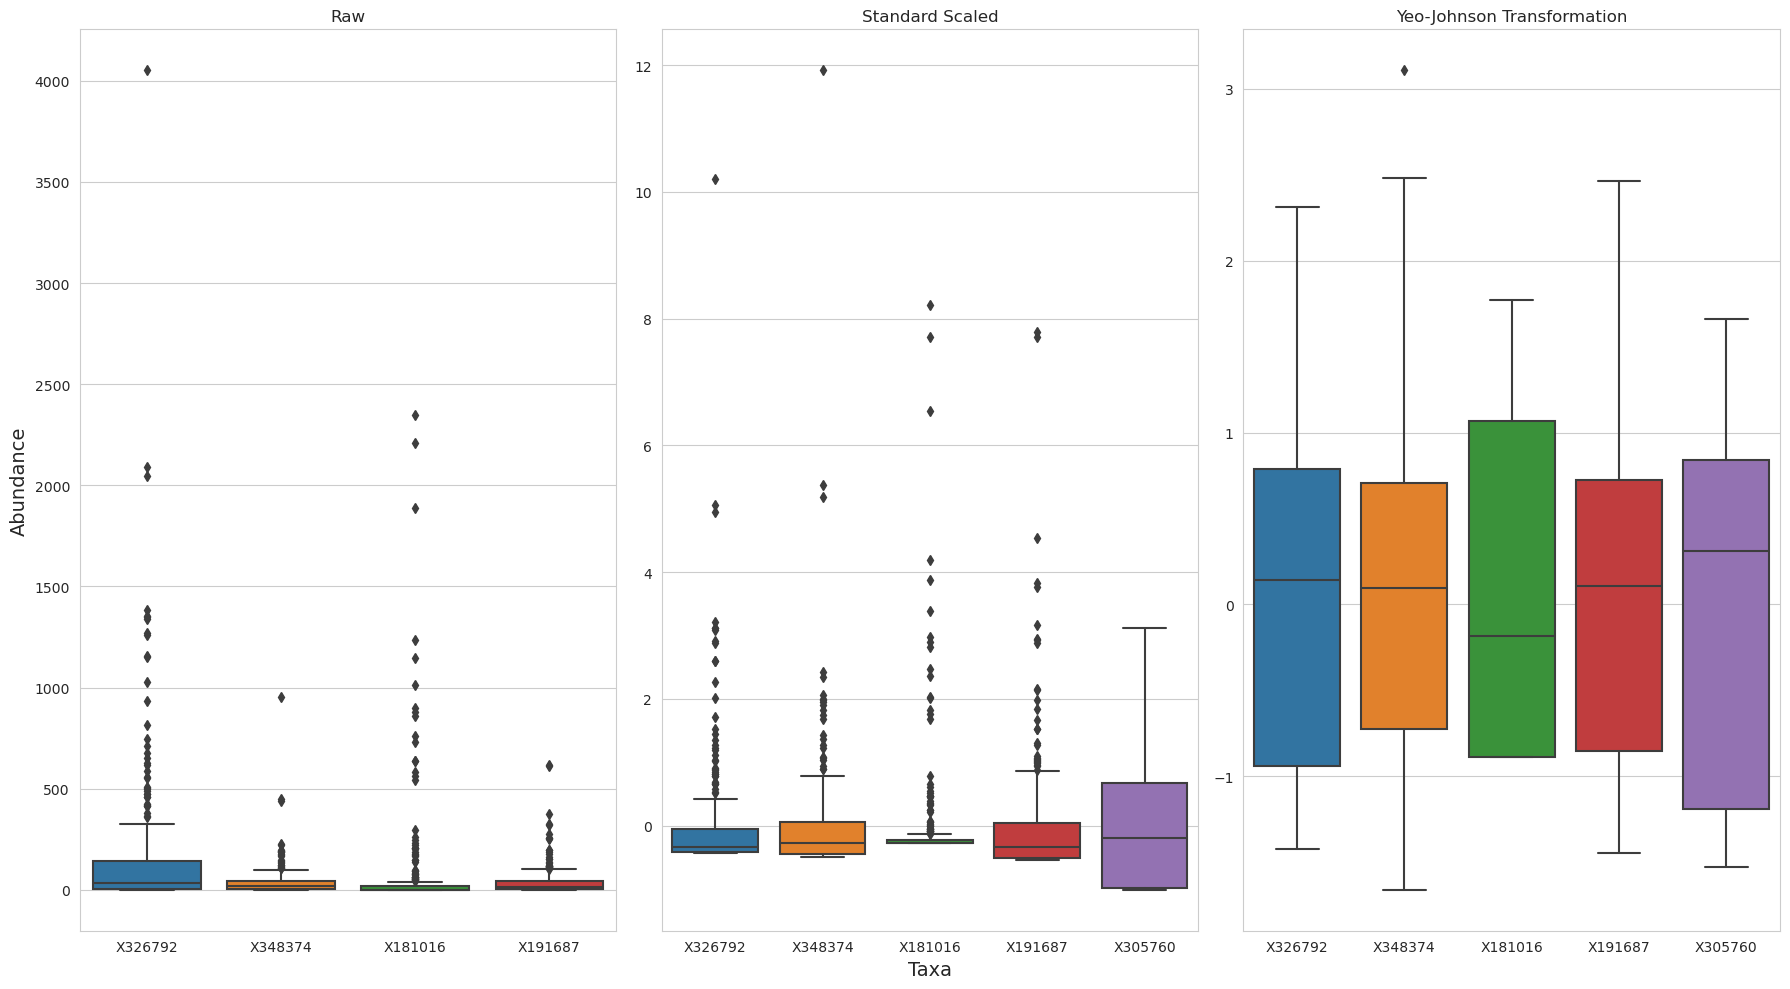

In [4]:
dataset_name = 'amgut1_data'
taxa_count = 5

# Set the style and size of the plots
sns.set_style("whitegrid")

# Create three dataframes with some sample data
df_raw = pd.read_csv(f'{root_data_dir}/{dataset_name}_update.csv')
df_raw = df_raw.iloc[:, :taxa_count]

df_ss = pd.read_csv(f'{root_data_dir}/{dataset_name}_standard_scaled.csv')
df_ss = df_ss.iloc[:, :taxa_count]

df_pt = pd.read_csv(f'{root_data_dir}/{dataset_name}_power_transformed.csv')
df_pt = df_pt.iloc[:, :taxa_count]

# Create a subplot with 1 row and 4 columns
fig, axes = plt.subplots(1, 3)

# increase the size of the plot
fig.set_size_inches(18, 10)

# Create a boxplot for each dataframe in each subplot
sns.boxplot(data=df_raw, ax=axes[0])
axes[0].set_title(f"Raw")

sns.boxplot(data=df_ss, ax=axes[1])
axes[1].set_title(f"Standard Scaled")

sns.boxplot(data=df_pt, ax=axes[2])
axes[2].set_title(f"Yeo-Johnson Transformation")

# add x and y labels to the second subplot
axes[0].set_ylabel("Abundance", fontsize=14)
axes[1].set_xlabel("Taxa", fontsize=14)


# Adjust the spacing and layout of the subplots
plt.tight_layout()
plt.show()

# TODO: Uncomment below to save the plot
# fig.savefig(f'{root_data_dir}/{dataset_name}_data_dist_boxplots.png', dpi=1500)
